In [31]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [32]:
df = pd.read_csv("datos/nutrition_values.csv")
df.head()

,Chain,Item,Type,Serving Size (g),Calories,Calories from fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,Burger King,Whopper Sandwich,Whopper Sandwiches,270.0,660,360,40.0,12,1.5,90,980,49,2,11,28
1,Burger King,Whopper Sandwich with Cheese,Whopper Sandwiches,292.0,740,420,46.0,16,2,115,1340,50,2,11,32
2,Burger King,Bacon & Cheese Whopper Sandwich,Whopper Sandwiches,303.0,790,460,51.0,17,2,125,1560,50,2,11,35
3,Burger King,Double Whopper Sandwich,Whopper Sandwiches,354.0,900,520,58.0,20,3,175,1050,49,2,11,48
4,Burger King,Double Whopper Sandwich with Cheese,Whopper Sandwiches,377.0,980,580,64.0,24,3,195,1410,50,2,11,52


In [33]:
df.Type.unique()

array(['Whopper Sandwiches', 'Flame Broiled Burgers', 'Chicken & More',
       'Salads & Sides', 'King Jr Meals  Entrees', 'King Jr Meals  Sides',
       'King Jr Meals  Beverages', 'King Jr Meals  Desserts', 'Desserts',
       'Breakfast', 'Additional Options', 'Shakes/Smoothies',
       'Soft Drinks', 'Hot Coffees', 'Iced Coffees', 'Frappes',
       'Sandwiches', 'French Fries', 'Chicken & Sauce', 'Salads',
       'Salad Dressings', 'Desserts/Shakes', 'Beverages',
       'McCafe Coffees  Nonfat Milk', 'McCafe Coffees  Whole Milk',
       'McCafe Frappes', 'McCafe Smoothies'], dtype=object)

['Whopper Sandwiches' 'Flame Broiled Burgers' 'Chicken & More'
 'Salads & Sides' 'King Jr Meals  Entrees' 'King Jr Meals  Sides'
 'King Jr Meals  Beverages' 'King Jr Meals  Desserts' 'Desserts'
 'Breakfast' 'Additional Options' 'Shakes/Smoothies' 'Soft Drinks'
 'Hot Coffees' 'Iced Coffees' 'Frappes' 'Sandwiches' 'French Fries'
 'Chicken & Sauce' 'Salads' 'Salad Dressings' 'Desserts/Shakes'
 'Beverages' 'McCafe Coffees  Nonfat Milk' 'McCafe Coffees  Whole Milk'
 'McCafe Frappes' 'McCafe Smoothies']


<AxesSubplot:xlabel='Serving Size (g)', ylabel='Calories'>

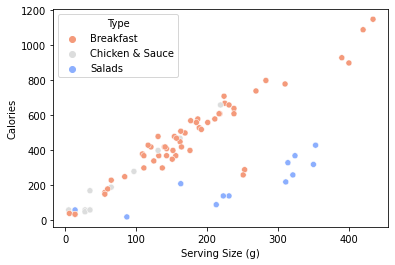

In [34]:
df = df[["Chain", "Item", "Type", "Serving Size (g)", "Calories"]]
print(df.Type.unique())

df = df.loc[df["Type"].isin(["Salads", "Breakfast", "Chicken & Sauce"])]
sns.scatterplot(data=df, x="Serving Size (g)", y="Calories", hue=df.Type, palette="coolwarm_r")

In [39]:
X = df[["Serving Size (g)", "Calories"]]
km = KMeans(n_clusters=3, n_init=2, init="random", random_state=42)
km.fit(X)
y_kmeans = km.predict(X)
y_kmeans

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1])

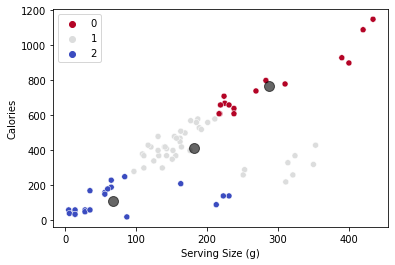

In [40]:
sns.scatterplot(data=df, x="Serving Size (g)", y="Calories", hue=y_kmeans, palette="coolwarm_r")
centers = km.cluster_centers_

plt.scatter(centers[:,0], centers[:, 1], c="black", s=100, alpha=0.6)